In [1]:
# # Car Evaluation Classification:

# This dataset focuses on analyzing the type of cars it may be based on features such as Hollows_Ratio and Circularities. 
# I used the following order of operations to evaluate my data. In the Final Results for this particular dataset we can see that the Logistic Regression Model as the best to use and performs best without using any ensemble approaches.
# 
# 1. Defining Problem: Investigating and characterize the problem in order to better understand the goals of the project.
# 2. Analyzing the Data: Using descriptive statistics and visualizations to better understand the data you have available.
# 3. Prepare Data: Use data transforms in order to better expose the structure of the prediction problem to modeling algorithms.
# 4. Evaluating the Algorithms: Design a test harness to evaluating the number of standard algorithms on the data and selecting the top few to investigate further.
# 5. Improve the Results: Use algorithm tuning and ensemble methods to get the most out of well-performing algorithms on your data.
# 6. Present Results: Finalize the model, make predictions and present results.

In [2]:
# importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier

In [3]:
# reading the data into dataframe:
df_vehicle = pd.read_csv('/home/dan/Desktop/Data/vehicle.csv')

### view the structure of the data for cleaning:

In [4]:
df_vehicle.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE CIRCULARITY', 'RADIUS RATIO',
       'PR.AXIS ASPECT RATIO', 'MAX.LENGTH ASPECT RATIO', 'SCATTER RATIO',
       'ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY',
       'SCALED VARIANCE_MAJOR', 'SCALED VARIANCE_MINOR',
       'SCALED RADIUS OF GYRATION', 'SKEWNESS ABOUT_MAJOR',
       'SKEWNESS ABOUT_MINOR', 'KURTOSIS ABOUT_MAJOR', 'KURTOSIS ABOUT_MINOR',
       'HOLLOWS RATIO', 'Class'],
      dtype='object')

In [5]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                846 non-null    float64
 1   CIRCULARITY                846 non-null    float64
 2   DISTANCE CIRCULARITY       846 non-null    float64
 3   RADIUS RATIO               846 non-null    float64
 4   PR.AXIS ASPECT RATIO       846 non-null    float64
 5   MAX.LENGTH ASPECT RATIO    846 non-null    float64
 6   SCATTER RATIO              846 non-null    float64
 7   ELONGATEDNESS              846 non-null    float64
 8   PR.AXIS RECTANGULARITY     846 non-null    float64
 9   MAX.LENGTH RECTANGULARITY  846 non-null    float64
 10  SCALED VARIANCE_MAJOR      846 non-null    float64
 11  SCALED VARIANCE_MINOR      846 non-null    float64
 12  SCALED RADIUS OF GYRATION  846 non-null    float64
 13  SKEWNESS ABOUT_MAJOR       846 non-null    float64

In [6]:
df_vehicle.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [7]:
df_vehicle.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [8]:
len(df_vehicle)

846

In [9]:
df_vehicle.COMPACTNESS

0       95.0
1       91.0
2      104.0
3       93.0
4       85.0
       ...  
841     93.0
842     89.0
843    106.0
844     86.0
845     85.0
Name: COMPACTNESS, Length: 846, dtype: float64

In [10]:
print(type(df_vehicle))

<class 'pandas.core.frame.DataFrame'>


In [11]:
df_vehicle

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE_MAJOR,SCALED VARIANCE_MINOR,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT_MAJOR,SKEWNESS ABOUT_MINOR,KURTOSIS ABOUT_MAJOR,KURTOSIS ABOUT_MINOR,HOLLOWS RATIO,Class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,saab
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,saab


In [12]:
df_vehicle.shape

(846, 19)

In [13]:
df_vehicle.ndim

2

In [14]:
df_vehicle['PR.AXIS ASPECT RATIO'].describe()

count    846.000000
mean      61.693853
std        7.888251
min       47.000000
25%       57.000000
50%       61.000000
75%       65.000000
max      138.000000
Name: PR.AXIS ASPECT RATIO, dtype: float64

### Renaming the columns in the dataset

#### Checking the missing values in the data

In [15]:
# importing the missingno library
import missingno as msno

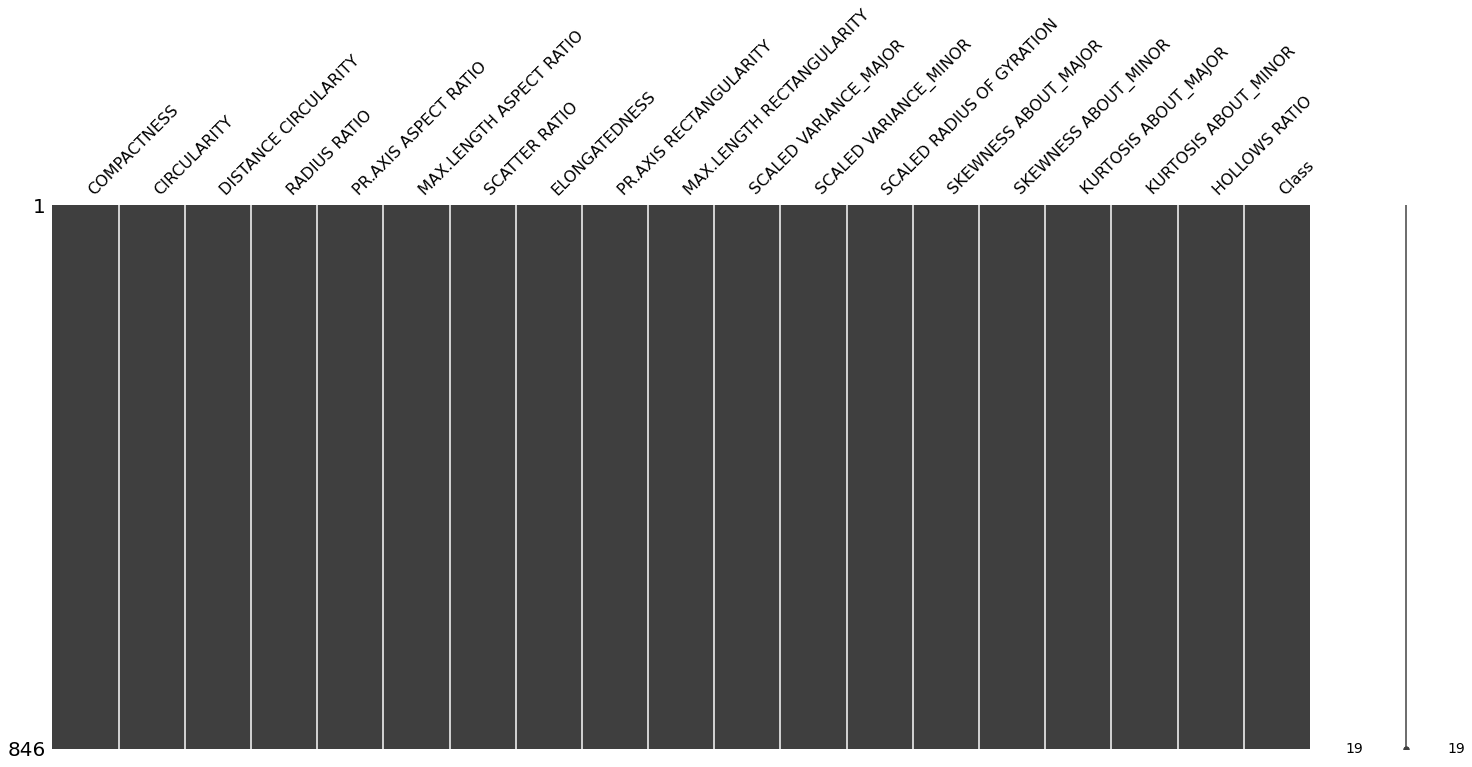

In [16]:
# visualizing the missing values as matrix:
msno.matrix(df_vehicle)

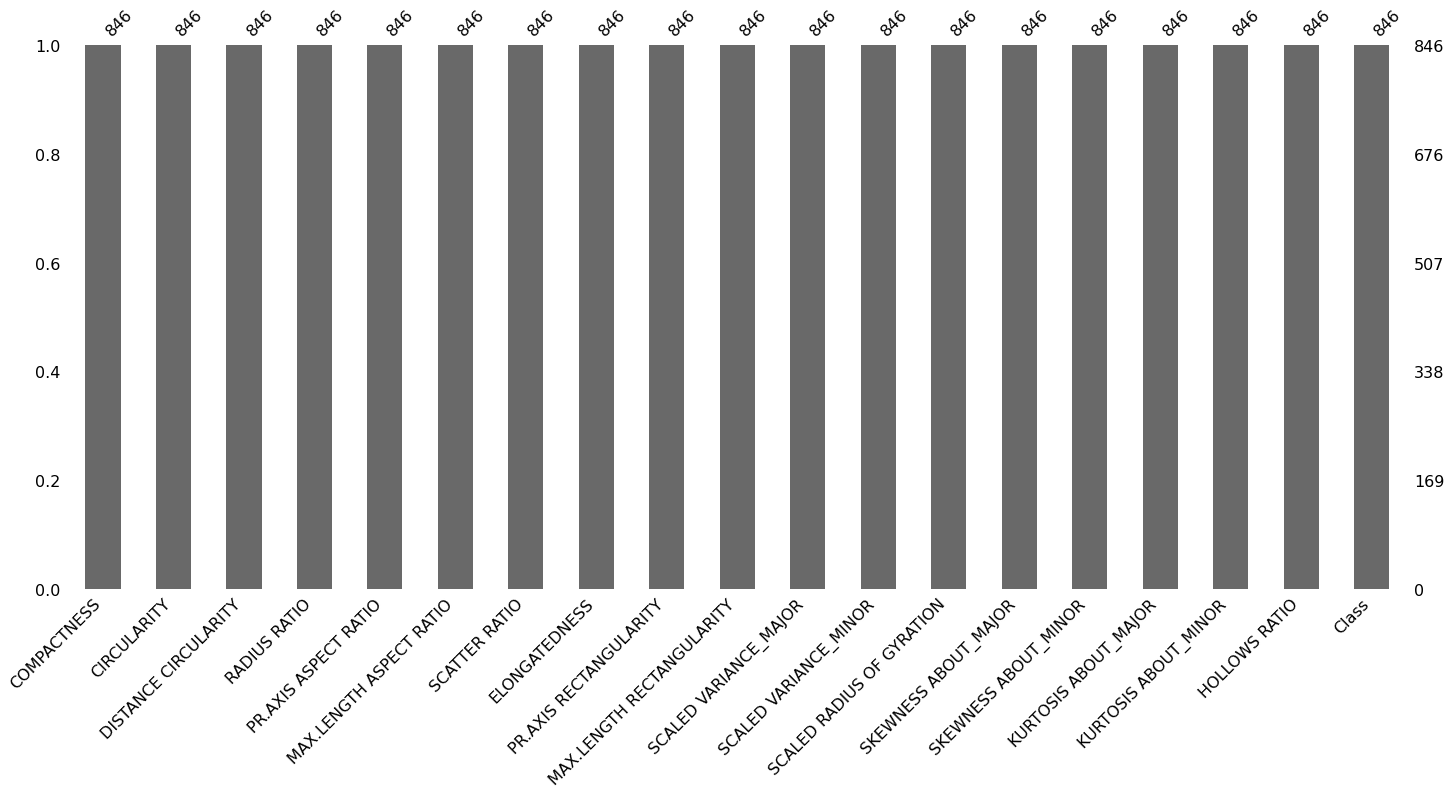

In [17]:
# using the Bar:
msno.bar(df_vehicle);

/home/dan/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/dan/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


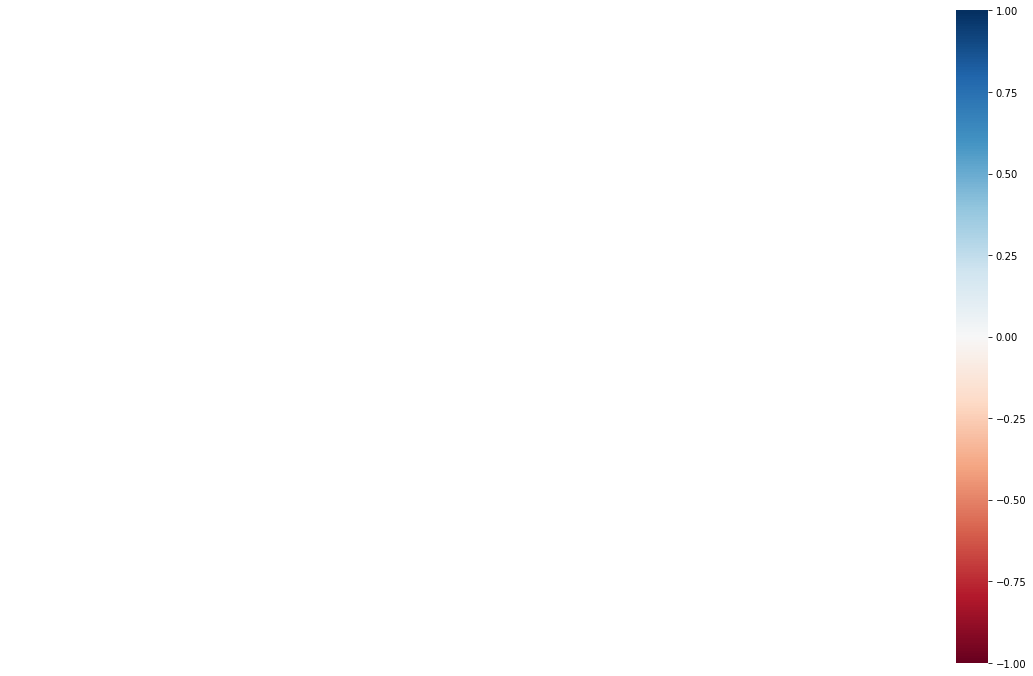

In [18]:
# using heatmap:
msno.heatmap(df_vehicle);

In [19]:
list(df_vehicle.keys())

['COMPACTNESS',
 'CIRCULARITY',
 'DISTANCE CIRCULARITY',
 'RADIUS RATIO',
 'PR.AXIS ASPECT RATIO',
 'MAX.LENGTH ASPECT RATIO',
 'SCATTER RATIO',
 'ELONGATEDNESS',
 'PR.AXIS RECTANGULARITY',
 'MAX.LENGTH RECTANGULARITY',
 'SCALED VARIANCE_MAJOR',
 'SCALED VARIANCE_MINOR',
 'SCALED RADIUS OF GYRATION',
 'SKEWNESS ABOUT_MAJOR',
 'SKEWNESS ABOUT_MINOR',
 'KURTOSIS ABOUT_MAJOR',
 'KURTOSIS ABOUT_MINOR',
 'HOLLOWS RATIO',
 'Class']

In [20]:
df_vehicle['Class'].head()

0     van
1     van
2    saab
3     van
4     bus
Name: Class, dtype: object

In [21]:
# importing the datetime and ast libraries:
import datetime as dt
import ast

#### function to remove any blank space from a string

In [22]:
def remove_whitespace(x):
    
    """
    A function to remove any blank space from a string
    x: a string
    """
    try:
        # Remove spaces inside of the string
        x = "".join(x.split())

    except:
        pass
    return x
#to= remove_whitespace(df)
#to.OnThyroxine
df_vehicle.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [23]:
df_vehicle.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

#### Understanding the data using visualizations and looking for correlations, and some algorithms may not perform as well if attributes are highly correlated.

In [24]:
df_vehicle.describe

<bound method NDFrame.describe of      COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0           95.0         48.0                  83.0         178.0   
1           91.0         41.0                  84.0         141.0   
2          104.0         50.0                 106.0         209.0   
3           93.0         41.0                  82.0         159.0   
4           85.0         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841         93.0         39.0                  87.0         183.0   
842         89.0         46.0                  84.0         163.0   
843        106.0         54.0                 101.0         222.0   
844         86.0         36.0                  78.0         146.0   
845         85.0         36.0                  66.0         123.0   

     PR.AXIS_ASPECT_RATIO  MAX.LENGTH_ASPECT_RATIO  SCATTER_RATIO  \
0                    72.0                     10.0          162.0   

In [25]:
df_vehicle.shape

(846, 19)

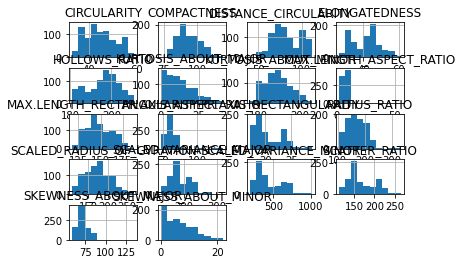

In [26]:
df_vehicle.hist()
plt.show()

In [27]:
correlations = df_vehicle.corr(method='pearson')
print(correlations)

                           COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  \
COMPACTNESS                   1.000000     0.692869              0.792444   
CIRCULARITY                   0.692869     1.000000              0.798492   
DISTANCE_CIRCULARITY          0.792444     0.798492              1.000000   
RADIUS_RATIO                  0.691659     0.622778              0.771644   
PR.AXIS_ASPECT_RATIO          0.093222     0.149692              0.161529   
MAX.LENGTH_ASPECT_RATIO       0.148249     0.247467              0.264309   
SCATTER_RATIO                 0.813003     0.860367              0.907280   
ELONGATEDNESS                -0.788647    -0.828755             -0.912307   
PR.AXIS_RECTANGULARITY        0.813437     0.857925              0.895326   
MAX.LENGTH_RECTANGULARITY     0.676143     0.965776              0.774524   
SCALED_VARIANCE_MAJOR         0.764415     0.808496              0.864432   
SCALED_VARIANCE_MINOR         0.818632     0.852679              0.889661   

In [28]:
skew = df_vehicle.skew()
print(skew)

COMPACTNESS                  0.381271
CIRCULARITY                  0.262799
DISTANCE_CIRCULARITY         0.107221
RADIUS_RATIO                 0.390706
PR.AXIS_ASPECT_RATIO         3.821560
MAX.LENGTH_ASPECT_RATIO      6.778394
SCATTER_RATIO                0.605779
ELONGATEDNESS                0.047845
PR.AXIS_RECTANGULARITY       0.770684
MAX.LENGTH_RECTANGULARITY    0.256359
SCALED_VARIANCE_MAJOR        0.651814
SCALED_VARIANCE_MINOR        0.835837
SCALED_RADIUS_OF_GYRATION    0.280231
SKEWNESS_ABOUT_MAJOR         2.072583
SKEWNESS_ABOUT_MINOR         0.773792
KURTOSIS_ABOUT_MAJOR         0.689325
KURTOSIS_ABOUT_MINOR         0.248541
HOLLOWS_RATIO               -0.226341
dtype: float64


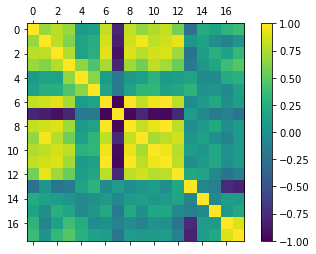

In [29]:
# ploting subplot of the data:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

In [30]:
array = df_vehicle.values
X = array[:,0:18]
Y = array[:,18]
validation_size = 0.20
num_folds = 10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

#### checking multiple Algorithms to which on perform better

In [31]:
# using the following model to check:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [32]:
# evaluating each model in turn:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_validation)
    print("Accuracy on  validation set:")
    print(accuracy_score(Y_validation, predictions))
    
#print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

LR: 0.717429 (0.016898)
Accuracy on  validation set:
0.7529411764705882
              precision    recall  f1-score   support

         bus       0.78      0.95      0.86        42
        opel       0.64      0.58      0.61        43
        saab       0.63      0.57      0.60        42
         van       0.93      0.91      0.92        43

    accuracy                           0.75       170
   macro avg       0.75      0.75      0.75       170
weighted avg       0.75      0.75      0.75       170

LDA: 0.775153 (0.018435)
Accuracy on  validation set:
0.7705882352941177
              precision    recall  f1-score   support

         bus       0.84      0.98      0.90        42
        opel       0.69      0.51      0.59        43
        saab       0.60      0.62      0.61        42
         van       0.91      0.98      0.94        43

    accuracy                           0.77       170
   macro avg       0.76      0.77      0.76       170
weighted avg       0.76      0.77      0

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will rais

KNN: 0.621362 (0.026101)
Accuracy on  validation set:
0.6941176470588235
              precision    recall  f1-score   support

         bus       0.90      0.86      0.88        42
        opel       0.58      0.44      0.50        43
        saab       0.46      0.52      0.49        42
         van       0.84      0.95      0.89        43

    accuracy                           0.69       170
   macro avg       0.69      0.69      0.69       170
weighted avg       0.69      0.69      0.69       170

CART: 0.692222 (0.040982)
Accuracy on  validation set:
0.7235294117647059
              precision    recall  f1-score   support

         bus       0.87      0.95      0.91        42
        opel       0.55      0.51      0.53        43
        saab       0.56      0.55      0.55        42
         van       0.88      0.88      0.88        43

    accuracy                           0.72       170
   macro avg       0.72      0.72      0.72       170
weighted avg       0.72      0.72     

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.461612 (0.036077)
Accuracy on  validation set:
0.49411764705882355
              precision    recall  f1-score   support

         bus       0.47      0.81      0.60        42
        opel       0.64      0.33      0.43        43
        saab       0.37      0.31      0.34        42
         van       0.56      0.53      0.55        43

    accuracy                           0.49       170
   macro avg       0.51      0.49      0.48       170
weighted avg       0.51      0.49      0.48       170



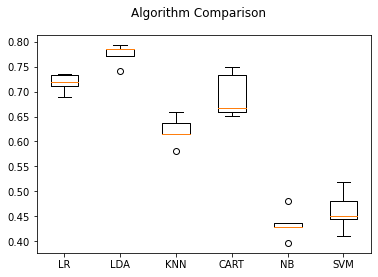

In [33]:
# plotting the Algorthmns comparison:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Standardizing data to see if results may change
We can see that logistic regression and LDA are still the best performing algorithms

In [34]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLda', Pipeline([('Scaler', StandardScaler()),('LASSO',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVR', SVC())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)# scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print("Accuracy on Training Data", msg)
    model.fit(X_train,Y_train)
    predictions = model.predict(X_validation)
    print("Accuracy of",name,"on validation set:" ,accuracy_score(Y_validation, predictions))
    print('\n')

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

Accuracy on Training Data ScaledLR: 0.780992 (0.039432)
Accuracy of ScaledLR on validation set: 0.7823529411764706


Accuracy on Training Data ScaledLda: 0.773529 (0.041123)
Accuracy of ScaledLda on validation set: 0.7705882352941177


Accuracy on Training Data ScaledKNN: 0.687752 (0.040861)
Accuracy of ScaledKNN on validation set: 0.7588235294117647




/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy on Training Data ScaledCART: 0.661172 (0.063409)
Accuracy of ScaledCART on validation set: 0.6941176470588235




/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy on Training Data ScaledSVM: 0.747015 (0.040539)
Accuracy of ScaledSVM on validation set: 0.7647058823529411


Accuracy on Training Data ScaledNB: 0.443635 (0.046624)
Accuracy of ScaledNB on validation set: 0.4764705882352941




/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


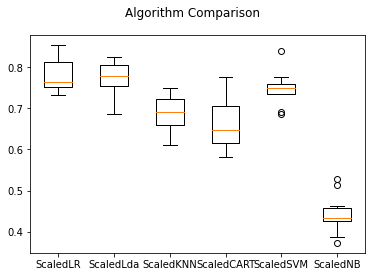

In [35]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

#### Feature Selection Using Principal Component Analysis and Select the KBest

In [36]:
features = []
features.append(('pca', PCA(n_components=13)))
features.append(('select_best', SelectKBest(k=10)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X_validation, Y_validation, cv=kfold)
print(results.mean())

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REA

0.676470588235294


/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

#### Now lets try Ensemble methods to see if we can improve results

In [37]:
# Various different parameters were tried but none seem to outperform the original logistic regression
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = KNeighborsClassifier()
estimators.append(('Knn', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

0.706890756302521


/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

In [38]:
num_trees = 15
seed=7
kfold = KFold(n_splits=5, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.6004037591367908


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
num_trees = 50
max_features = 7
kfold = KFold(n_splits=10, random_state=7)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.7528151260504201


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
seed = 7
num_trees = 114
kfold = KFold(n_splits=5, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

/home/dan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.770657848938392
